In [98]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [60]:
retail_df = pd.read_excel('/Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Getting the basic data information

In [61]:
retail_df.shape


(541909, 8)

In [5]:
retail_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [62]:
retail_df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Data Cleaning


In [63]:
# Calculating the Missing Values % contribution in DF

df_null_values = round(100*(retail_df.isnull().sum())/len(retail_df), 2)
df_null_values

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [64]:
# Droping rows having missing values

retail = retail_df.dropna()
retail.shape

(406829, 8)

In [65]:
# Checking the dtypes
retail_df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [67]:
# Changing the datatype of Customer Id as per Business understanding

retail_df['CustomerID'] = retail['CustomerID'].astype(str)
retail_df["CustomerID"]

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
541904,12680.0
541905,12680.0
541906,12680.0
541907,12680.0


# Feature Engineering

In [69]:
# New Attribute : Monetary

retail_df['Amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [70]:
# Grouping the data in the retail DataFrame by the 'CustomerID' column
# to calculates the sum of the 'Amount' column for each customer.

rfm_m = retail_df.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_m.head()


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [71]:
# New Attribute : Frequency
# count the number of unique invoice numbers for each customer
rfm_f = retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [72]:
rfm_f.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [73]:
rfm_f.dtypes

,0
CustomerID,object
InvoiceNo,int64


In [74]:
rfm_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [75]:
# Merging the two dfs

merged_rfm = rfm_m.merge(rfm_f, on='CustomerID')
# another way
# rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [76]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 44.1+ MB


In [77]:
retail_df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
Amount,float64


In [78]:
# Convert to datetime to proper datatype
# Deriving new columns

retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [79]:
# Compute the maximum date to know the last transaction date in our dataset

max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [80]:
# calculate the time difference between the maximum date in the dataset and the transaction date for each record

retail_df['Diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [81]:
# Compute last transaction date to get the recency of customers
# As each customer may have multiple invonces that has been purshsed
# So we need to create a indicator that tells us when he made the last transaction to find wather he is active or not

rfm_p = retail_df.groupby('CustomerID')['Diff'].min().reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [82]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [83]:
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [84]:
# Merge tha dataframes to get the final RFM dataframe

merged_rfm = merged_rfm.merge(rfm_p, on='CustomerID')

merged_rfm.rename(columns={'Diff': 'Recency'}, inplace=True)
merged_rfm.head()


,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


##

## There are 2 types of outliers and we will treat outliers as it can skew our dataset

Statistical

Domain specific

In [85]:

# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_rfm[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()


In [86]:
# Select attributes for the new analysis
attributes_frequency_amount = ['Amount', 'Frequency']

# Create a DataFrame with the selected attributes
data_frequency_amount = merged_rfm[attributes_frequency_amount]

# Create a box plot for outliers analysis
fig_frequency_amount = px.box(data_frequency_amount, y=attributes_frequency_amount,
                              labels={'variable': 'Attributes', 'value': 'Range'},
                              title="Outliers Variable Distribution for Amount and Frequency")

fig_frequency_amount.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)

# Show the plot
fig_frequency_amount.show()

In [87]:
import plotly.express as px

# Create a scatter plot for Amount vs Frequency
fig_scatter = px.scatter(merged_rfm, x='Amount', y='Frequency',
                         title="Scatter Plot of Amount vs Frequency",
                         labels={'Amount': 'Amount', 'Frequency': 'Frequency'},
                         opacity=0.6)

# Customize the layout for better visualization
fig_scatter.update_layout(
    xaxis=dict(title="Amount"),
    yaxis=dict(title="Frequency"),
    width=800, height=600
)

# Show the plot
fig_scatter.show()

In [88]:

# Removing (statistical) outliers for Amount

Q1 = merged_rfm.Amount.quantile(0.05)
Q3 = merged_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Amount >= Q1 - 1.5*IQR) & (merged_rfm.Amount <= Q3 + 1.5*IQR)]



# Removing (statistical) outliers for Recency
Q1 = merged_rfm.Recency.quantile(0.05)
Q3 = merged_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Recency >= Q1 - 1.5*IQR) & (merged_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = merged_rfm.Frequency.quantile(0.05)
Q3 = merged_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Frequency >= Q1 - 1.5*IQR) & (merged_rfm.Frequency <= Q3 + 1.5*IQR)]

#### Purpose of Outlier Removal:

Outliers can distort statistical analyses and models by introducing noise and skewing the results.

By removing outliers, you can achieve a more accurate representation of the dataset and its underlying patterns. This leads to more reliable insights and improved model performance.

However, it's important to approach outlier removal carefully, with the 1.5*IQR rule being a common guideline. The decision to remove outliers should always align with the context and specific business objectives.

In conclusion, the code provided removes statistical outliers from the "Amount," "Recency," and "Frequency" attributes to ensure that subsequent analyses and modeling are based on a cleaner and more representative dataset.

In [90]:
# Scatter plot for Amount vs Frequency after outlier removal
fig_scatter = px.scatter(merged_rfm, x='Amount', y='Frequency',
                         title="Scatter Plot of Amount vs Frequency (After Outlier Removal)",
                         labels={'Amount': 'Amount', 'Frequency': 'Frequency'},
                         opacity=0.6)


fig_scatter.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800, height=600
)

# Show the plot
fig_scatter.show()

## Rescaling the Attributes
#### It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

##### 1-Min-Max scaling
##### 2-Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [91]:
# Rescaling the attributes

merged_rfm = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_rfm)
rfm_df_scaled.shape

(4293, 3)

In [92]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# Building the Model


### K-Means Clustering

## K-means clustering is a widely used and simple unsupervised machine learning algorithm. The algorithm operates through the following steps:

Initialization: First, we randomly select k initial points, called centroids or means.

Assignment: Each data point is then assigned to the closest centroid based on a distance metric, typically Euclidean distance.

Update: After assigning the points, the centroids are updated by calculating the mean of all the data points assigned to each centroid.

Iteration: This process of assignment and update is repeated for a set number of iterations or until the centroids no longer change significantly, resulting in the formation of clusters.

At the end of the process, the algorithm produces k distinct clusters based on the data.

In [93]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [94]:
kmeans.labels_


array([2, 3, 0, ..., 2, 0, 0], dtype=int32)

### Finding the Optimal Number of Clusters


#### Elbow Curve to get the right number of Clusters

###### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [95]:

ssd_list = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd_list.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd_list,
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


For n_clusters=2, the Elbow score is 8703.493695588313
For n_clusters=3, the Elbow score is 4433.74768934762
For n_clusters=4, the Elbow score is 3361.247349149538
For n_clusters=5, the Elbow score is 2941.4899003883556
For n_clusters=6, the Elbow score is 2392.6741203891615
For n_clusters=7, the Elbow score is 2047.6038797445265
For n_clusters=8, the Elbow score is 1899.4847963183543


In [96]:
ssd_list

[8703.493695588313,
 4433.74768934762,
 3361.247349149538,
 2941.4899003883556,
 2392.6741203891615,
 2047.6038797445265,
 1899.4847963183543]

## Silhouette Analysis

####  silhouette score=p−q/max(p,q)

1-**p**
  
  **is the mean distance to the points in the nearest cluster that the data point is not a part of**

2-**q
  is the mean intra-cluster distance to all the points in its own cluster.**


3-**The value of the silhouette score range lies between -1 to 1.**

**A score closer to 1 indicates that the data point is very similar to other data points in the cluster,**

**A score closer to -1 indicates that the data point is not similar to the data points in its cluster.**

#### Silhouette analysis

helps you assess the quality of clustering and find the number of clusters that best fits your data. Let's break down the code and understand its purpose:

**Purpose of Silhouette Analysis:**

Silhouette analysis helps you assess the quality of clustering for different numbers of clusters.


The silhouette score ranges from -1 to 1, with higher values indicating better cluster separation and cohesion.


By examining silhouette scores for various cluster numbers, you can determine the optimal number of clusters that best fit your data.


In summary, this code performs silhouette analysis for a range of cluster numbers using K-Means clustering on the standardized RFM data. It helps you select the number of clusters that provides the best clustering quality for your data.

In [97]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.4143574854128909
For n_clusters=6, the silhouette score is 0.41698547252648926
For n_clusters=7, the silhouette score is 0.41493333476205857
For n_clusters=8, the silhouette score is 0.40740249218977026


## When choosing the number of clusters for a clustering problem, it's important to consider both the silhouette score and the elbow method results, as they provide complementary insights. Here's how to make the decision based on your provided results:

### Silhouette Score:

The silhouette score measures the quality of the clusters.

Higher silhouette scores indicate better separation and cohesion of clusters.

In your case, the highest silhouette score is for 2 clusters (0.5416), but the second-highest score is for 3 clusters (0.5085), which is still quite good.


### Elbow Method:

The elbow method looks at the reduction in error (WCSS) as you increase the number of clusters.

The point where adding more clusters doesn't significantly reduce the error is often considered the "elbow" and a reasonable choice for the number of clusters.


### Decision:

**Silhouette Score:** The silhouette score suggests that 2 clusters or 3 clusters are both reasonable choices. Both options have good silhouette scores, with 2 clusters having a slightly higher score.

**Elbow Method:** The elbow method suggests that the "elbow" point occurs at 3 clusters. This is where the reduction in error starts to slow down significantly.

### Conclusion:

Based on the silhouette score, you could choose either 2 or 3 clusters, and both are valid choices.

However, considering the results from both methods and the fact that the elbow method indicates a clear point at 3 clusters, it may be a good idea to choose 3 clusters as the number of clusters for your clustering analysis.

Ultimately, the choice between 2 and 3 clusters depends on your specific problem, the insights you want to gain, and your preference for having a more detailed or simplified grouping of your data.

You can start with 3 clusters and, if needed, explore the results further to see if they make sense for your particular application.


In [34]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [35]:
 kmeans.labels_


array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [36]:
# assign the label
merged_rfm['Cluster_Id'] = kmeans.labels_
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id
0,0.00,2,325,0
1,4310.00,182,1,2
2,1797.24,31,74,1
3,1757.55,73,18,1
4,334.40,17,309,0


In [37]:

fig = px.box(merged_rfm, x='Cluster_Id', y='Amount',
             title="Cluster Id vs Amount Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster_Id')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [38]:

fig = px.scatter(merged_rfm, x='Cluster_Id', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)

fig.show()


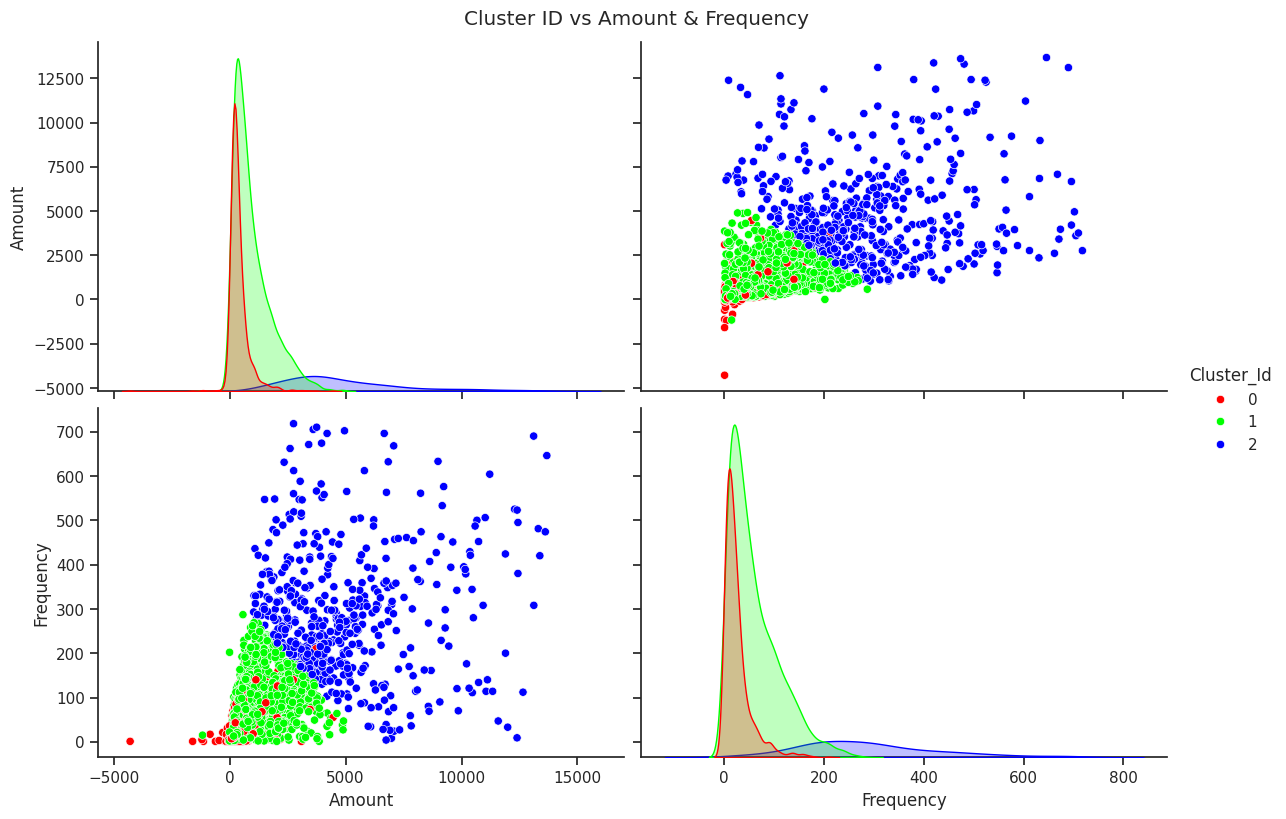

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()


In [40]:

fig = px.box(merged_rfm, x='Cluster_Id', y='Frequency',
             title="Cluster Id vs Frequency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


# Box plot to visualize Cluster Id vs Recency



In [41]:

fig = px.box(merged_rfm, x='Cluster_Id', y='Recency',
             title="Cluster Id vs Recency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [42]:
# Selecting the two features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(merged_rfm, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()


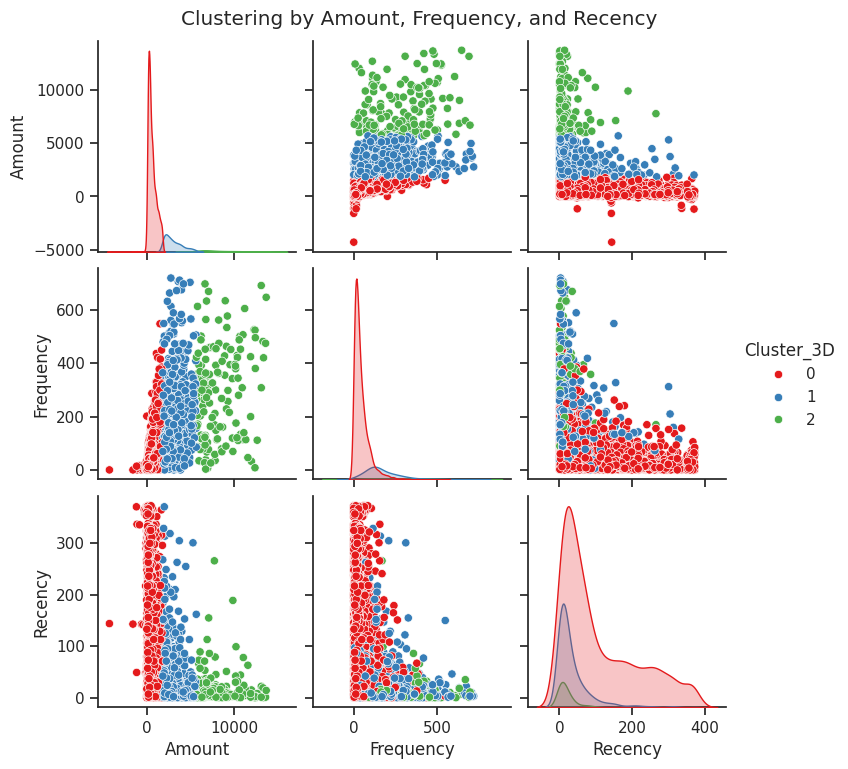

In [43]:
# Selecting the three features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()


In [44]:
import plotly.express as px

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()


## Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive

Agglomerative.

**Single Linkage:**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

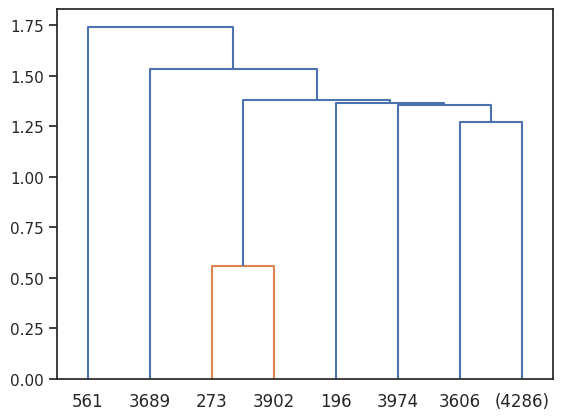

In [46]:
# Single linkage:

import sys
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Increase recursion limit if necessary
sys.setrecursionlimit(10000)

# Perform hierarchical clustering with single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')

# Plot the dendrogram
dendrogram(mergings, truncate_mode='level', p=5)  # Optionally truncate
plt.show()

**Complete Linkage**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

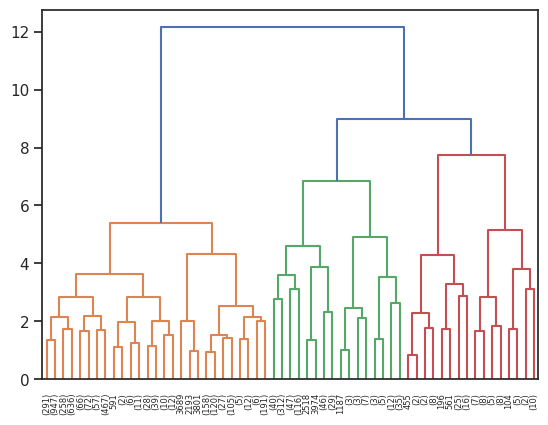

In [49]:

# Perform hierarchical clustering with complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')

# Plot the dendrogram with truncation to avoid deep recursion
dendrogram(mergings, truncate_mode='level', p=5)  # Truncate at level 5
plt.show()

**Average Linkage:**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

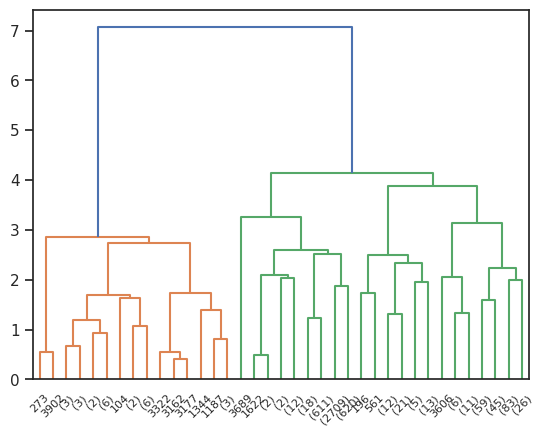

In [50]:
# Perform hierarchical clustering with average linkage
mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')

# Plot the dendrogram with truncation to manage the depth
dendrogram(mergings, truncate_mode='level', p=5)  # Truncate at level 5
plt.show()


#### Cutting the Dendrogram based on K


In [51]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Assign cluster labels

merged_rfm['Cluster_Labels'] = cluster_labels
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id,Cluster_2D,Cluster_3D,Cluster_Labels
0,0.00,2,325,0,0,0,0
1,4310.00,182,1,2,2,1,0
2,1797.24,31,74,1,0,0,0
3,1757.55,73,18,1,0,0,0
4,334.40,17,309,0,0,0,0


In [53]:

fig = px.box(merged_rfm, x='Cluster_Labels', y='Amount',
             title="Cluster Labels vs Amount Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Amount': 'Amount'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [54]:

fig = px.box(merged_rfm, x='Cluster_Labels', y='Frequency',
             title="Cluster Labels vs Frequency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [55]:

fig = px.box(merged_rfm, x='Cluster_Labels', y='Recency',
             title="Cluster Labels vs Recency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


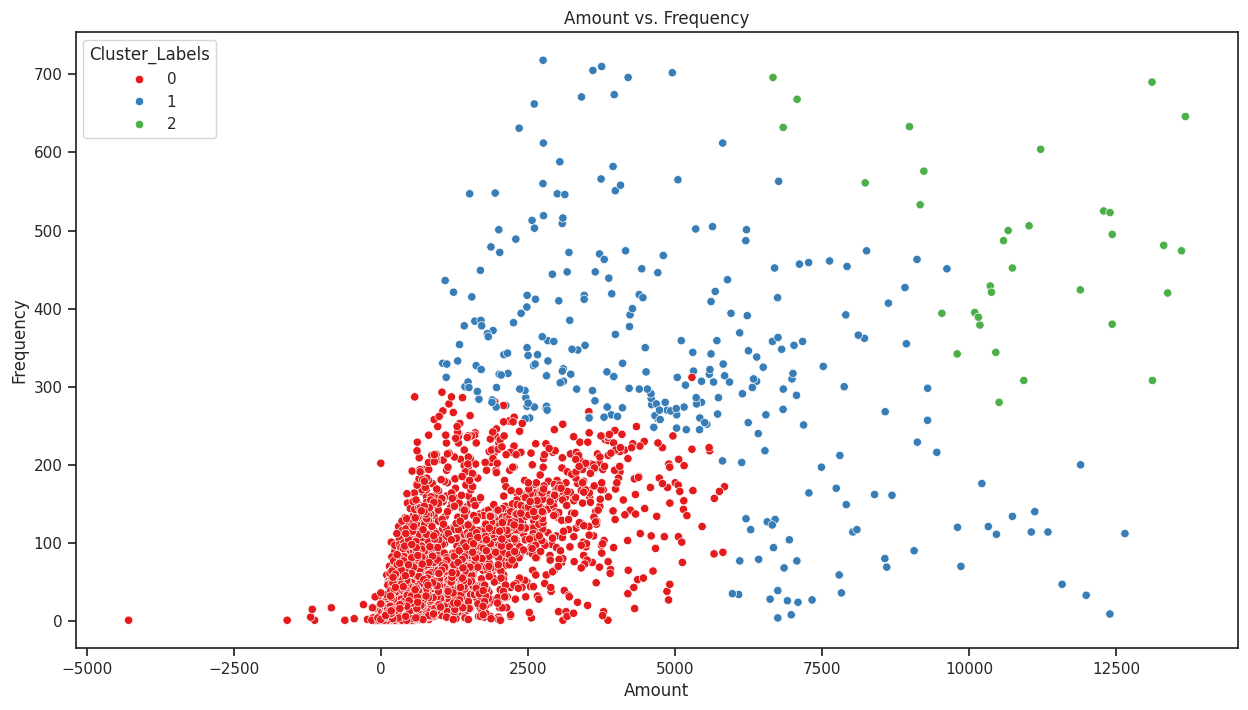

In [56]:
# Pairwise scatter plots for clustering (2D)
plt.figure(figsize=(15, 8))  # Adjust the figure size here

# Amount vs. Frequency
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Frequency');


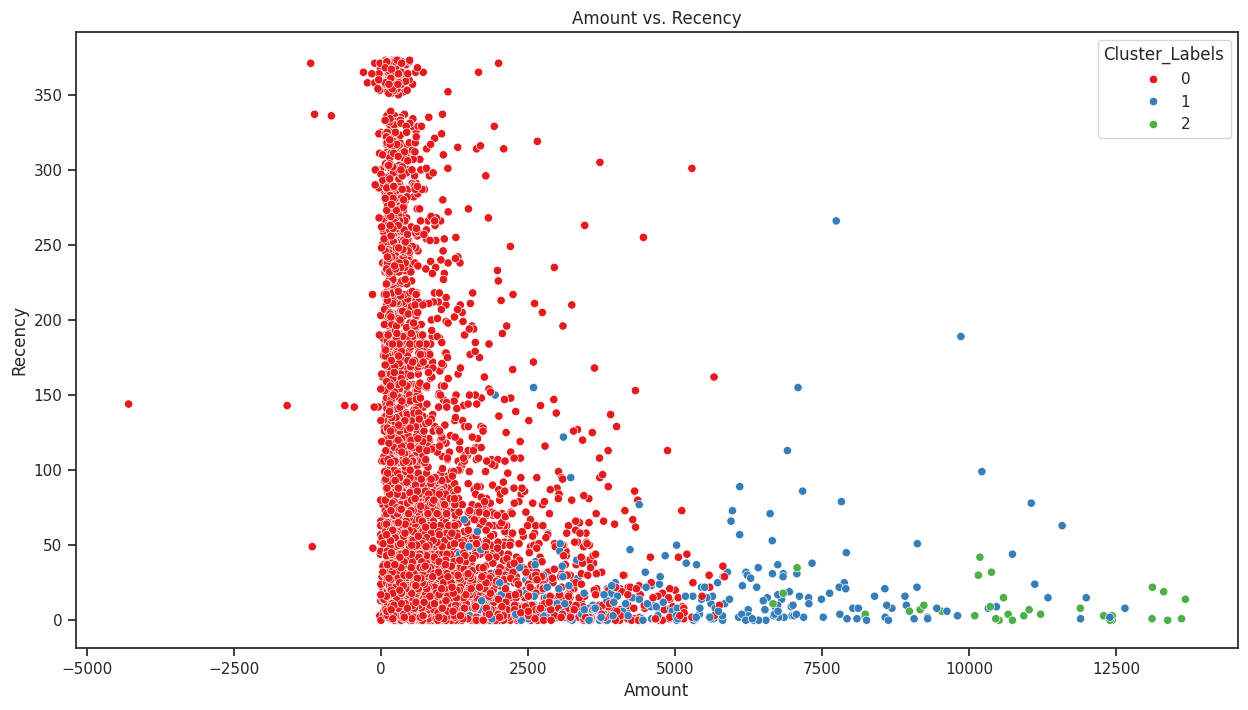

In [57]:
plt.figure(figsize=(15, 8))  # Adjust the figure size here

sns.scatterplot(x='Amount', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Recency');




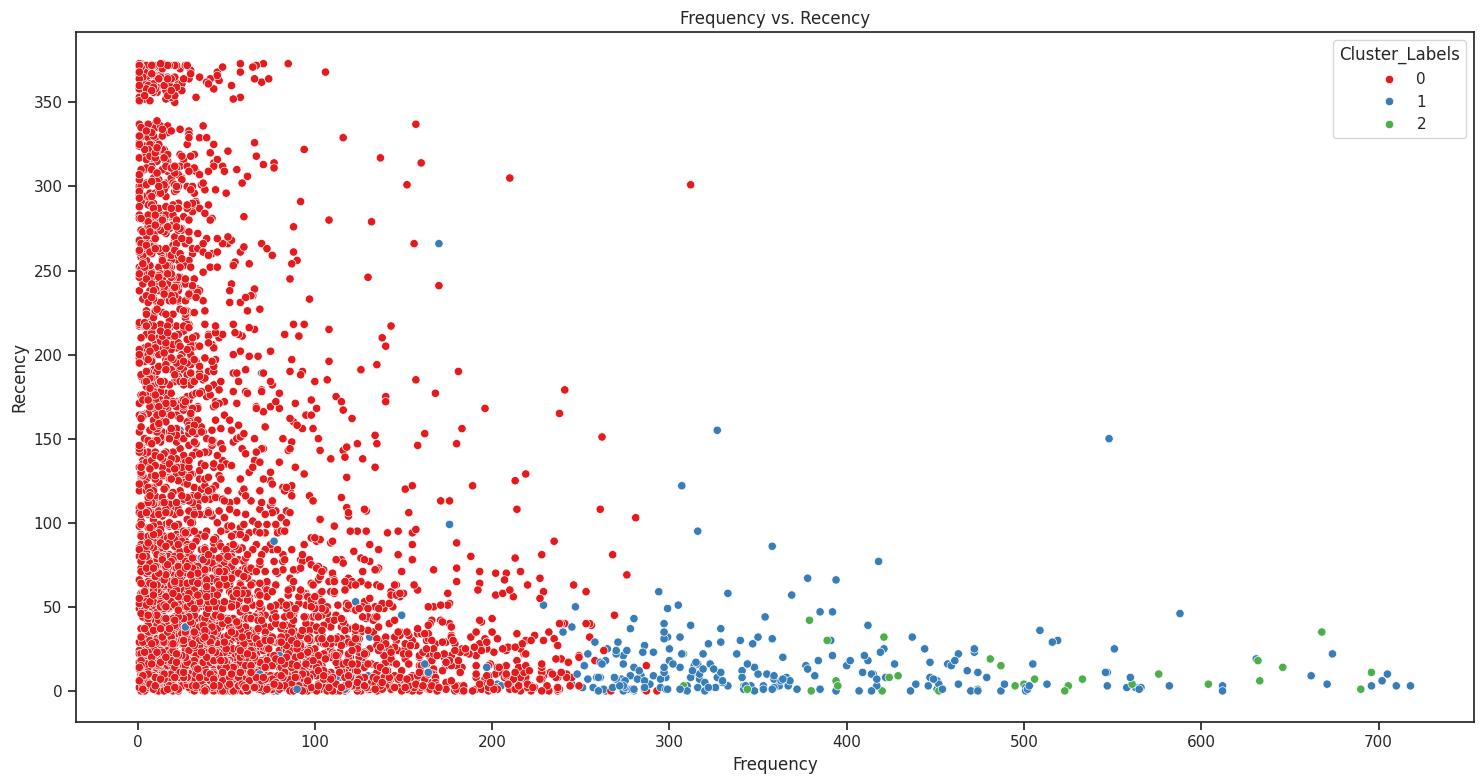

In [58]:
# Frequency vs. Recency
plt.figure(figsize=(15, 8))  # Adjust the figure size here
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Frequency vs. Recency')

plt.tight_layout()
plt.show()

In [59]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()


### Our Analytical results

Inference:

### K-Means Clustering with 3 Cluster Ids

**Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.**

**Customers with Cluster Id 1 are frequent buyers.**

**Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.**

**Hierarchical Clustering with 3 Cluster Labels**

**Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.**

**Customers with Cluster_Labels 2 are frequent buyers.**

**Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.**